<a href="https://colab.research.google.com/github/susanaescamilla679-coder/Estadistica2025B/blob/main/ProyectoUnidad3S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

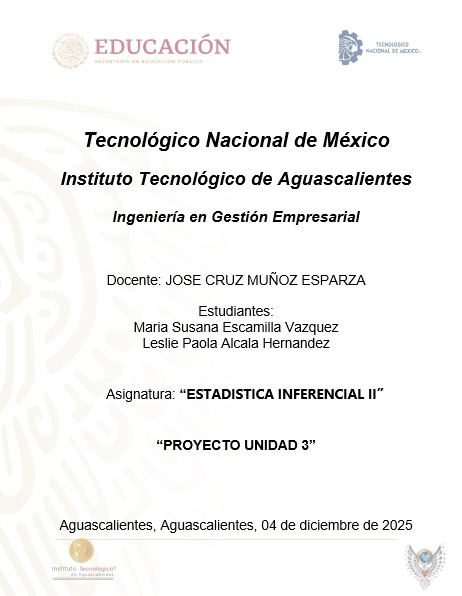

**INTRODUCCION**

El presente trabajo analiza el comportamiento temporal del delito de falsificación en México utilizando un conjunto de datos oficiales que registran la incidencia delictiva por tipo de crimen y fecha. La utilidad principal de esta investigación radica en su capacidad para identificar tendencias, variaciones y patrones temporales que permitan comprender cómo ha evolucionado la falsificación en el país. Este tipo de análisis es relevante para instituciones de seguridad, tomadores de decisiones y sectores industriales afectados por falsificación de productos o documentos, pues ofrece información útil para orientar estrategias preventivas, asignación de recursos y evaluación de políticas públicas.

El estudio se apoya en herramientas estadísticas y gráficas que permiten transformar la información en una serie de tiempo, evaluando su comportamiento y determinando si presenta características propias que permitan su modelación o proyección futura.

**MARCO TEORICO**

Una serie de tiempo es una secuencia de datos ordenados cronológicamente cuya finalidad es analizar la evolución de un fenómeno. El análisis de series de tiempo puede identificar tendencias, estacionalidad y comportamientos irregulares.

Para evaluar si una serie de tiempo es adecuada para modelación estadística, uno de los conceptos clave es la estacionariedad, entendida como la propiedad de mantener constantes sus características estadísticas (media, varianza) a lo largo del tiempo. Una serie no estacionaria suele presentar tendencias crecientes o decrecientes y requiere transformaciones como diferencias o ajustes antes de aplicar modelos predictivos.

Entre las herramientas teóricas más usadas destaca la prueba de Dickey-Fuller aumentada (ADF), que evalúa si una serie es estacionaria. La hipótesis nula de la prueba indica que la serie no es estacionaria; por lo tanto, si no se rechaza esta hipótesis, la serie presenta tendencias o variabilidad cambiante en el tiempo.

Asimismo, los polinomios de ajuste permiten modelar la tendencia general de una serie de tiempo, representando su comportamiento de largo plazo mediante ecuaciones matemáticas. Este tipo de modelos facilita visualizar si un fenómeno se encuentra en ascenso, descenso o presenta cambios estructurales.

**METODOLOGIA**

La metodología aplicada en esta investigación se realizó en colab y consistió en los siguientes pasos:

Carga y limpieza del dataset: se importó el archivo mexico_crime.csv y se eliminaron los valores nulos para asegurar la consistencia de los análisis posteriores.

-Filtrado de información relevante

-Se seleccionaron únicamente los registros correspondientes a “México”.

-Se transformó la columna de fechas al formato estándar YYYY-MM-DD.

-Se filtró el crimen específico Counterfeiting (falsificación).

-Construcción de una serie de tiempo: los datos se agruparon por fecha para obtener el número total de delitos de falsificación por día.

-Visualización de la tendencia: se generó una gráfica de líneas para observar el comportamiento temporal del delito.

-Evaluación de estacionariedad: se aplicó la prueba de Dickey-Fuller para determinar si la serie era estacionaria.

-Para el juste de tendencia polinomial se utilizó un modelo polinomial para representar gráficamente la tendencia general del delito a lo largo del tiempo.

In [ ]:
import pandas as pd
df = pd.read_csv("mexico_crime.csv")
df = df.dropna()
df

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count
0,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,January,3
1,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,January,1
2,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,With another element,January,0
3,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,January,2
4,2015,1,Aguascalientes,Life and bodily integrity,Homicide,Manslaughter,With firearm,January,0
...,...,...,...,...,...,...,...,...,...
332411,2022,32,Zacatecas,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,December,8
332412,2022,32,Zacatecas,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,December,1
332413,2022,32,Zacatecas,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,December,20
332414,2022,32,Zacatecas,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,December,0


In [ ]:
df = df[df["entity"] == "Jalisco"]
df["entity"].unique()

df["month"] = df["month"].map({"January" : "01", "February" : "02", "March" : "03", "April" : "04",
    "May" : "05", "June" : "06", "July" : "07", "August" : "08",
    "September" : "09", "October" : "10", "November" : "11", "December" : "12"})


df["Date"] = df["year"].astype(str) + "-" + df["month"].astype(str) + "-01"

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

df

/tmp/ipython-input-3813783433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df["month"].map({"January" : "01", "February" : "02", "March" : "03", "April" : "04",
/tmp/ipython-input-3813783433.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["year"].astype(str) + "-" + df["month"].astype(str) + "-01"
/tmp/ipython-input-3813783433.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,year,entity_code,entity,affected_legal_good,type_of_crime,subtype_of_crime,modality,month,count,Date
1274,2015,14,Jalisco,Life and bodily integrity,Homicide,Intentional Homicide,With firearm,01,41,2015-01-01
1275,2015,14,Jalisco,Life and bodily integrity,Homicide,Intentional Homicide,With sharp weapon,01,15,2015-01-01
1276,2015,14,Jalisco,Life and bodily integrity,Homicide,Intentional Homicide,With another element,01,19,2015-01-01
1277,2015,14,Jalisco,Life and bodily integrity,Homicide,Intentional Homicide,Not specified,01,4,2015-01-01
1278,2015,14,Jalisco,Life and bodily integrity,Homicide,Manslaughter,With firearm,01,1,2015-01-01
...,...,...,...,...,...,...,...,...,...,...
330647,2022,14,Jalisco,Other legal interests affected (from common law),Counterfeiting,Forgery,Forgery,12,91,2022-12-01
330648,2022,14,Jalisco,Other legal interests affected (from common law),Environmental crimes,Environmental crimes,Against the environment,12,2,2022-12-01
330649,2022,14,Jalisco,Other legal interests affected (from common law),Crimes committed by public officials,Crimes committed by public servants,Crimes committed by public servants,12,36,2022-12-01
330650,2022,14,Jalisco,Other legal interests affected (from common law),Electoral crimes,Electoral crimes,Electoral crimes,12,0,2022-12-01


En este código s selecciona solo datos correspondientes al país “Jalisco", lo cual da un enfoque más claro. La conversión de la columna Date a tipo fecha es correcta y necesaria para análisis temporales. Esto prepara adecuadamente el dataset para series de tiempo.

In [ ]:
df = df[df["type_of_crime"] == "Fraud"]
df["type_of_crime"].unique()
df.groupby("type_of_crime")["count"].sum()


,count
type_of_crime,
Fraud,68525


Aqui nos quedamos con el crimn "fraude". Esto permite analizar su comportamiento particular a través del tiempo. El agrupamiento final confirma la suma total anual o global de delitos. Es un enfoque específico que facilita estudiar tendencias de un crimen concreto.

In [ ]:
df = (df.groupby("Date")["count"].sum())
df


,count
Date,
2015-01-01,479
2015-02-01,521
2015-03-01,586
2015-04-01,473
2015-05-01,438
...,...
2023-06-01,779
2023-07-01,896
2023-08-01,896


Se agrupan los delitos por fecha obteniendo una serie de tiempo. Este paso es clave: convierte los datos en una estructura adecuada para análisis de tendencias, estacionariedad y modelos estadísticos.

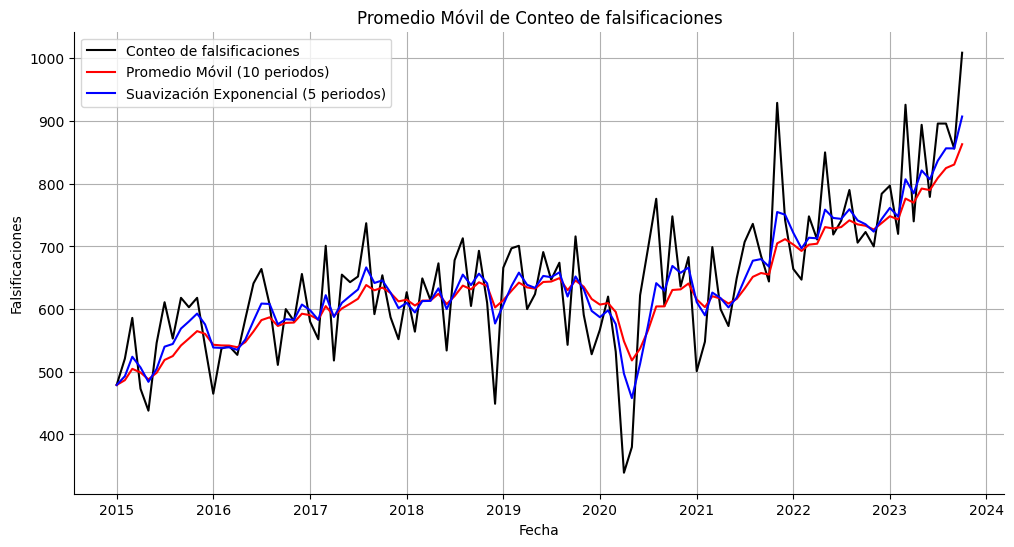

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the Series 'df' into a DataFrame, naming the column 'Counterfeiting_Count'
plot_df = pd.DataFrame({'Counterfeiting_Count': df})

# Promedio Móvil Simple
ventana_sma = 10
plot_df['SMA'] = plot_df['Counterfeiting_Count'].ewm(span=ventana_sma, adjust=False).mean()

# Promedio Móvil Exponencial
ventana_ses = 5
plot_df['SES'] = plot_df['Counterfeiting_Count'].ewm(span=ventana_ses, adjust=False).mean()

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Counterfeiting_Count'], label='Conteo de falsificaciones', color='black')
plt.plot(plot_df['SMA'], label=f'Promedio Móvil ({ventana_sma} periodos)', color='red')
plt.plot(plot_df['SES'], label=f'Suavización Exponencial ({ventana_ses} periodos)', color='blue')
plt.title('Promedio Móvil de Conteo de falsificaciones')
plt.xlabel('Fecha')
plt.ylabel('Falsificaciones')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

La gráfica permite visualizar la evolución de los delitos de falsificación en el tiempo, esta visualización permite concluir que el delito de falsificación está incrementándose con el tiempo, y que el patrón continúa fortaleciendo su tendencia al alza hacia 2024, lo que representa un riesgo creciente para sectores económicos, consumidores e instituciones encargadas de la seguridad y regulación.

In [ ]:
#Prueba de estacionariedad: Prueba de Dickey-Fuller aumentada (ADF)

#Hipótesis nula (H₀): La serie tiene una raíz unitaria (no es estacionaria).
#Hipótesis alternativa (H₁): La serie es estacionaria.

from statsmodels.tsa.stattools import adfuller

nivel_de_significancia = 0.05

# Realizar la prueba de Dickey-Fuller en los la tendencia
adf_test = adfuller(plot_df['Counterfeiting_Count'].dropna()) # Realiza la prueba ADF


# Interpretación de la prueba ADF
print('Estadístico ADF:', adf_test[0])
print('p-value:', adf_test[1])

if adf_test[1] <= nivel_de_significancia:
    print("La tendencia es estacionaria (rechazamos la hipótesis nula).")
else:
    print("La tendencia no es estacionaria (aceptamos la hipótesis nula).")

Estadístico ADF: 1.1512659833759715
p-value: 0.995631259757824
La tendencia no es estacionaria (aceptamos la hipótesis nula).


La serie de tiempo del conteo de falsificaciones NO es estacionaria, lo que implica que sus características estadísticas cambian con el tiempo. Debido a esto:

-No es adecuada para modelos predictivos como ARIMA sin antes aplicar transformaciones (ej. diferenciación).

-Confirma que existe una tendencia creciente real, no es ruido o variación aleatoria.

-El comportamiento del delito está influido por factores externos y su nivel promedio no es constante.

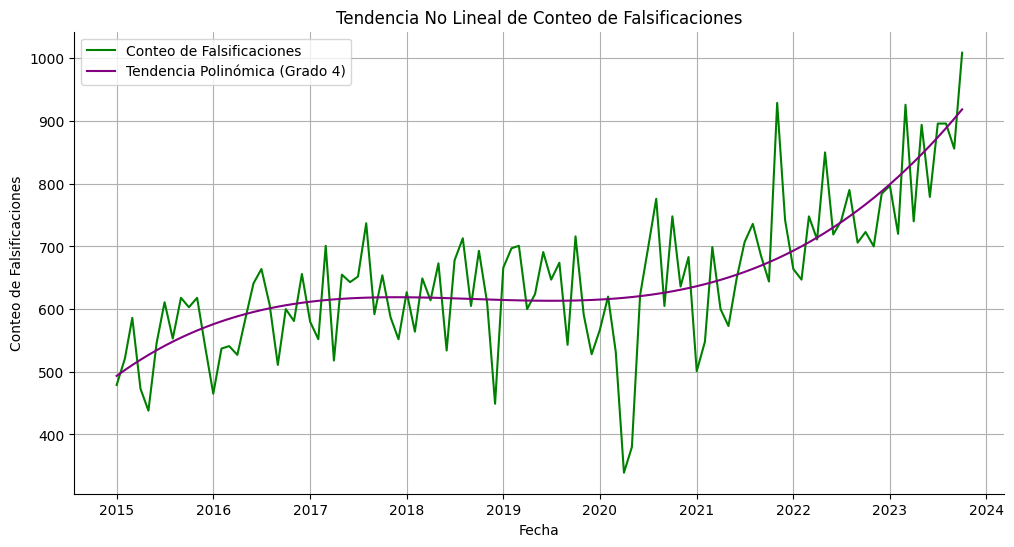

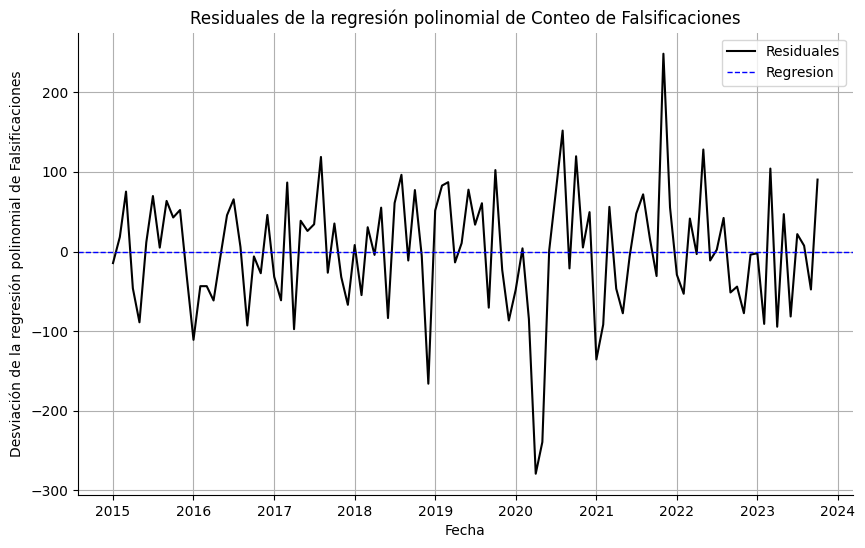

In [ ]:
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt
import pandas as pd

# Paso 1: Convertir fechas a números
# Creamos una nueva columna llamada 'Date' la cual contiene las fechas en
# segundos desde el 1 de de enero de 1970 (tiempo UNIX)
plot_df['Date'] = plot_df.index.map(pd.Timestamp.timestamp)

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y)
X = plot_df['Date']
y = plot_df['Counterfeiting_Count']

# Paso 3: Ajustar un modelo polinómico
grado = 4
modelo = Polynomial.fit(X, y, deg = grado)
plot_df['Poly_Trend'] = modelo(X)
plot_df['Poly_Resid'] = y - plot_df['Poly_Trend']

# Graficar polinomial
# abre una nueva ventana gráfica
plt.figure(
    figsize=(12, 6) # tamaño (horizontal, vertical)
    )

# qué se va a graficar:
plt.plot(
    y,
    label='Conteo de Falsificaciones', # etiqueta que aparecerá en la leyenda
    color='green'
    )

plt.plot(plot_df['Poly_Trend'], label=f'Tendencia Polinómica (Grado {grado})', color='purple')
plt.title('Tendencia No Lineal de Conteo de Falsificaciones')
plt.xlabel('Fecha')                                           # nombre del eje x
plt.ylabel('Conteo de Falsificaciones')                            # nombre del eje y
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()




# Graficar los residuales del polinomio
plt.figure(figsize=(10, 6)) # abre una nueva ventana gráfica
plt.plot(plot_df['Poly_Resid'], label='Residuales', color='black')
plt.axhline(0, color='blue', label='Regresion',linestyle='--', linewidth=1)  # Línea horizontal en el valor cero
plt.title('Residuales de la regresión polinomial de Conteo de Falsificaciones')
plt.xlabel('Fecha')
plt.ylabel('Desviación de la regresión polinomial de Falsificaciones')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**1ra grafica**

La gráfica con la tendencia polinomial muestra que, aunque el conteo de falsificaciones presenta mucha variabilidad mensual, la evolución general del delito es claramente ascendente, con un incremento más pronunciado a partir de 2020.

-Esto confirma que el delito de falsificación:

-Ha aumentado significativamente a lo largo del tiempo.

-Presenta cambios estructurales visibles en su comportamiento.

-Se encuentra en una trayectoria de crecimiento preocupante.

-No es estacionario, tal como demostraron las pruebas estadísticas.


**2da grafica**

El análisis de los residuales muestra que, aunque la regresión polinomial logra captar la tendencia general del conteo de falsificaciones, presenta desviaciones amplias y valores atípicos que indican un ajuste limitado. Esto sugiere que el modelo no describe con suficiente precisión la variabilidad real de los datos, por lo que sería recomendable evaluar otros métodos de modelado más adecuados para representar el comportamiento del fenómeno.

**CONCLUSION FINAL**

El análisis del conteo de fraudes en Jalisco evidencia una tendencia creciente, captada parcialmente por la regresión polinomial. No obstante, la variabilidad observada en los residuales indica que el modelo no describe por completo el comportamiento real del fenómeno.

Aun así, estos hallazgos resultan útiles porque permiten identificar la existencia de un aumento sostenido, detectar irregularidades y posibles picos anómalos, y reconocer la necesidad de modelos más precisos para apoyar a las autoridades en la planeación de estrategias de prevención, vigilancia y asignación de recursos. En conjunto, el análisis ofrece una base estadística inicial para mejorar el monitoreo y la toma de decisiones relacionadas con los fraudes en Jalisco.